In [1]:
from eda_imports import *

import pysam

import kleat.misc.settings as S
import kleat.misc.utils as U

In [2]:
sys.path.insert(0, '../benchmark_scripts/')

In [3]:
adf = pd.read_pickle('../benchmark_transcriptome/after-num-suffix-reads-fix-renamed-header/HBRC4.ml_ready.pkl')

In [4]:
from ml_utils import KARBOR_FEATURE_COLS

In [5]:
from train_arbor import map_to_ref, load_polya_seq_df

In [6]:
df_ref = load_polya_seq_df('HBRC4')

2018-07-24 17:40:31,658|INFO|reading /projects/cheny_prj/KLEAT_benchmarking/polyA_seq/Brain1.bed ...


In [7]:
map_cutoff = 50

In [8]:
%time df_mapped = map_to_ref(adf, df_ref, map_cutoff)

2018-07-24 17:40:33,170|INFO|mapping predicted clv to ground truth ...


CPU times: user 12.4 s, sys: 635 ms, total: 13 s
Wall time: 13 s


In [9]:
df_mapped['is_tp'] = df_mapped.abs_dist < map_cutoff

In [10]:
adf.head(2)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,any_contig_is_hardclipped,contig_max_len,contig_max_mapq,num_contigs_suffix,num_contigs_bridge,num_contigs_link,num_contigs_blank,num_total_contigs,num_reads_suffix,num_reads_bridge,num_reads_link,max_read_tail_len_suffix,max_read_tail_len_bridge,max_contig_tail_len_suffix,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,abs_dist_to_aclv,ctg_AAAAAG,ctg_AAAACA,ctg_AAGAAA,ctg_AATAAA,ctg_AATACA,ctg_AATAGA,ctg_AATATA,ctg_AATGAA,ctg_ACTAAA,ctg_AGTAAA,ctg_ATTAAA,ctg_CATAAA,ctg_GATAAA,ctg_GGGGCT,ctg_NA,ctg_TATAAA,ctg_TTTAAA,ref_AAAAAG,ref_AAAACA,ref_AAGAAA,ref_AATAAA,ref_AATACA,ref_AATAGA,ref_AATATA,ref_AATGAA,ref_ACTAAA,ref_AGTAAA,ref_ATTAAA,ref_CATAAA,ref_GATAAA,ref_GGGGCT,ref_NA,ref_TATAAA,ref_TTTAAA
0,chr1,+,12556,13671,DDX11L1,ENSG00000223972,-1115,blank,01.S.508265@110,False,111,3,0,0,0,1,1,0,0,0,0,0,0,AAGAAA,5,12543,13,AAGAAA,5,12543,13,1115,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chr1,+,14602,14413,DDX11L1,ENSG00000223972,189,blank,E2.L.2150@240,False,241,3,0,0,0,1,1,0,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
df_mapped.head(2)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,any_contig_is_hardclipped,contig_max_len,contig_max_mapq,num_contigs_suffix,num_contigs_bridge,num_contigs_link,num_contigs_blank,num_total_contigs,num_reads_suffix,num_reads_bridge,num_reads_link,max_read_tail_len_suffix,max_read_tail_len_bridge,max_contig_tail_len_suffix,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,abs_dist_to_aclv,ctg_AAAAAG,ctg_AAAACA,ctg_AAGAAA,ctg_AATAAA,ctg_AATACA,ctg_AATAGA,ctg_AATATA,ctg_AATGAA,ctg_ACTAAA,ctg_AGTAAA,ctg_ATTAAA,ctg_CATAAA,ctg_GATAAA,ctg_GGGGCT,ctg_NA,ctg_TATAAA,ctg_TTTAAA,ref_AAAAAG,ref_AAAACA,ref_AAGAAA,ref_AATAAA,ref_AATACA,ref_AATAGA,ref_AATATA,ref_AATGAA,ref_ACTAAA,ref_AGTAAA,ref_ATTAAA,ref_CATAAA,ref_GATAAA,ref_GGGGCT,ref_NA,ref_TATAAA,ref_TTTAAA,mapped_ref_clv,dist,abs_dist,is_tp
0,chr1,+,12556,13671,DDX11L1,ENSG00000223972,-1115,blank,01.S.508265@110,False,111,3,0,0,0,1,1,0,0,0,0,0,0,AAGAAA,5,12543,13,AAGAAA,5,12543,13,1115,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,564710.0,552154.0,552154.0,False
1,chr1,+,14602,14413,DDX11L1,ENSG00000223972,189,blank,E2.L.2150@240,False,241,3,0,0,0,1,1,0,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,564710.0,550108.0,550108.0,False


In [12]:
Xs = adf[KARBOR_FEATURE_COLS].values

In [13]:
Xs.shape

(931053, 33)

In [14]:
%time Xs_scaled = StandardScaler().fit_transform(Xs)

/projects/btl2/zxue/kleat/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


CPU times: user 2.22 s, sys: 261 ms, total: 2.48 s
Wall time: 2.47 s


In [15]:
tsne = TSNE(n_components=2, verbose=True)

In [16]:
%time Xs_em = tsne.fit_transform(Xs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 931053 samples in 8.832s...
[t-SNE] Computed neighbors for 931053 samples in 193.039s...
[t-SNE] Computed conditional probabilities for sample 1000 / 931053
[t-SNE] Computed conditional probabilities for sample 2000 / 931053
[t-SNE] Computed conditional probabilities for sample 3000 / 931053
[t-SNE] Computed conditional probabilities for sample 4000 / 931053
[t-SNE] Computed conditional probabilities for sample 5000 / 931053
[t-SNE] Computed conditional probabilities for sample 6000 / 931053
[t-SNE] Computed conditional probabilities for sample 7000 / 931053
[t-SNE] Computed conditional probabilities for sample 8000 / 931053
[t-SNE] Computed conditional probabilities for sample 9000 / 931053
[t-SNE] Computed conditional probabilities for sample 10000 / 931053
[t-SNE] Computed conditional probabilities for sample 11000 / 931053
[t-SNE] Computed conditional probabilities for sample 12000 / 931053
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 127000 / 931053
[t-SNE] Computed conditional probabilities for sample 128000 / 931053
[t-SNE] Computed conditional probabilities for sample 129000 / 931053
[t-SNE] Computed conditional probabilities for sample 130000 / 931053
[t-SNE] Computed conditional probabilities for sample 131000 / 931053
[t-SNE] Computed conditional probabilities for sample 132000 / 931053
[t-SNE] Computed conditional probabilities for sample 133000 / 931053
[t-SNE] Computed conditional probabilities for sample 134000 / 931053
[t-SNE] Computed conditional probabilities for sample 135000 / 931053
[t-SNE] Computed conditional probabilities for sample 136000 / 931053
[t-SNE] Computed conditional probabilities for sample 137000 / 931053
[t-SNE] Computed conditional probabilities for sample 138000 / 931053
[t-SNE] Computed conditional probabilities for sample 139000 / 931053
[t-SNE] Computed conditional probabilities for sample 140000 / 931053
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 249000 / 931053
[t-SNE] Computed conditional probabilities for sample 250000 / 931053
[t-SNE] Computed conditional probabilities for sample 251000 / 931053
[t-SNE] Computed conditional probabilities for sample 252000 / 931053
[t-SNE] Computed conditional probabilities for sample 253000 / 931053
[t-SNE] Computed conditional probabilities for sample 254000 / 931053
[t-SNE] Computed conditional probabilities for sample 255000 / 931053
[t-SNE] Computed conditional probabilities for sample 256000 / 931053
[t-SNE] Computed conditional probabilities for sample 257000 / 931053
[t-SNE] Computed conditional probabilities for sample 258000 / 931053
[t-SNE] Computed conditional probabilities for sample 259000 / 931053
[t-SNE] Computed conditional probabilities for sample 260000 / 931053
[t-SNE] Computed conditional probabilities for sample 261000 / 931053
[t-SNE] Computed conditional probabilities for sample 262000 / 931053
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 373000 / 931053
[t-SNE] Computed conditional probabilities for sample 374000 / 931053
[t-SNE] Computed conditional probabilities for sample 375000 / 931053
[t-SNE] Computed conditional probabilities for sample 376000 / 931053
[t-SNE] Computed conditional probabilities for sample 377000 / 931053
[t-SNE] Computed conditional probabilities for sample 378000 / 931053
[t-SNE] Computed conditional probabilities for sample 379000 / 931053
[t-SNE] Computed conditional probabilities for sample 380000 / 931053
[t-SNE] Computed conditional probabilities for sample 381000 / 931053
[t-SNE] Computed conditional probabilities for sample 382000 / 931053
[t-SNE] Computed conditional probabilities for sample 383000 / 931053
[t-SNE] Computed conditional probabilities for sample 384000 / 931053
[t-SNE] Computed conditional probabilities for sample 385000 / 931053
[t-SNE] Computed conditional probabilities for sample 386000 / 931053
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 496000 / 931053
[t-SNE] Computed conditional probabilities for sample 497000 / 931053
[t-SNE] Computed conditional probabilities for sample 498000 / 931053
[t-SNE] Computed conditional probabilities for sample 499000 / 931053
[t-SNE] Computed conditional probabilities for sample 500000 / 931053
[t-SNE] Computed conditional probabilities for sample 501000 / 931053
[t-SNE] Computed conditional probabilities for sample 502000 / 931053
[t-SNE] Computed conditional probabilities for sample 503000 / 931053
[t-SNE] Computed conditional probabilities for sample 504000 / 931053
[t-SNE] Computed conditional probabilities for sample 505000 / 931053
[t-SNE] Computed conditional probabilities for sample 506000 / 931053
[t-SNE] Computed conditional probabilities for sample 507000 / 931053
[t-SNE] Computed conditional probabilities for sample 508000 / 931053
[t-SNE] Computed conditional probabilities for sample 509000 / 931053
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 643000 / 931053
[t-SNE] Computed conditional probabilities for sample 644000 / 931053
[t-SNE] Computed conditional probabilities for sample 645000 / 931053
[t-SNE] Computed conditional probabilities for sample 646000 / 931053
[t-SNE] Computed conditional probabilities for sample 647000 / 931053
[t-SNE] Computed conditional probabilities for sample 648000 / 931053
[t-SNE] Computed conditional probabilities for sample 649000 / 931053
[t-SNE] Computed conditional probabilities for sample 650000 / 931053
[t-SNE] Computed conditional probabilities for sample 651000 / 931053
[t-SNE] Computed conditional probabilities for sample 652000 / 931053
[t-SNE] Computed conditional probabilities for sample 653000 / 931053
[t-SNE] Computed conditional probabilities for sample 654000 / 931053
[t-SNE] Computed conditional probabilities for sample 655000 / 931053
[t-SNE] Computed conditional probabilities for sample 656000 / 931053
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 830000 / 931053
[t-SNE] Computed conditional probabilities for sample 831000 / 931053
[t-SNE] Computed conditional probabilities for sample 832000 / 931053
[t-SNE] Computed conditional probabilities for sample 833000 / 931053
[t-SNE] Computed conditional probabilities for sample 834000 / 931053
[t-SNE] Computed conditional probabilities for sample 835000 / 931053
[t-SNE] Computed conditional probabilities for sample 836000 / 931053
[t-SNE] Computed conditional probabilities for sample 837000 / 931053
[t-SNE] Computed conditional probabilities for sample 838000 / 931053
[t-SNE] Computed conditional probabilities for sample 839000 / 931053
[t-SNE] Computed conditional probabilities for sample 840000 / 931053
[t-SNE] Computed conditional probabilities for sample 841000 / 931053
[t-SNE] Computed conditional probabilities for sample 842000 / 931053
[t-SNE] Computed conditional probabilities for sample 843000 / 931053
[t-SNE] Computed con

In [12]:
print(1)

1


In [13]:
df_em = pd.DataFrame(Xs_em)

In [14]:
df_em.head(2)

,0,1
0,1.466513,0.690232
1,2.255866,-0.030351


In [25]:
df_em['is_tp'] = df_mapped.is_tp

Text(0.5,1,'HBRC4')

2018-07-21 19:25:42,476|DEBUG|findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/projects/btl/zxue/tasrkleat-TCGA-results/venv/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


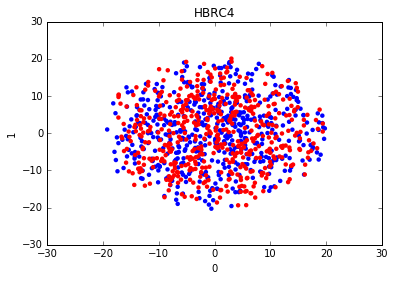

In [29]:
ax = plt.axes()
df_em.query('is_tp == 1').sample(500).plot.scatter(x=0, y=1, color='blue', edgecolor='none', ax=ax)
df_em.query('is_tp == 0').sample(500).plot.scatter(x=0, y=1, color='red', edgecolor='none', ax=ax)
ax.set_title('HBRC4')

# Compare current version and a previous ref-hex-dist version

In [2]:
adf = pd.read_pickle('../benchmark_transcriptome/with-ctg-clv/UHRC1.pkl')

In [3]:
adf.shape

(870121, 30)

In [5]:
adf.query('num_suffix_contigs >1').head(2)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
209,chr1,+,564808,564814,MTND1P23,ENSG00000225972,-6,suffix,E0.S.99330@81|E1.S.21331@63,94,3,False,2,0,0,0,2,0,12,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1
419,chr1,+,567477,567997,hsa-mir-6723,ENSG00000237973,-520,suffix,E0.L.48586@158|E0.L.60105@172,174,3,False,2,0,0,0,2,0,1,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1


In [7]:
mismatch_df = adf.query('ctg_hex_id != ref_hex_id')

In [8]:
mismatch_df.shape

(102230, 30)

In [6]:
mismatch_df.ref_hex.value_counts()

AAAAAG    15550
AATAAA    13146
TTTAAA    12747
NA        9874 
ATTAAA    7479 
AAGAAA    6949 
AAAACA    5706 
TATAAA    4466 
GGGGCT    4234 
AATACA    3240 
AGTAAA    3204 
CATAAA    2911 
AATGAA    2604 
GATAAA    2562 
AATATA    2421 
ACTAAA    2127 
AATAGA    2113 
Name: ref_hex, dtype: int64

In [7]:
mismatch_df.query('ref_hex == "AATAAA"').evidence_type.value_counts()

blank            12225
bridge           544  
suffix           365  
blank|suffix     7    
blank|bridge     3    
bridge|suffix    1    
link             1    
Name: evidence_type, dtype: int64

In [8]:
cur_df.query('ctg_hex_id != ref_hex_id')\
    .sort_values('max_suffix_contig_tail_len', ascending=False)\
    .query('ref_hex == "AATAAA"')\
    .query('max_contig_mapq == 40')\
    .head(20)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
23908,chr1,+,114520421,114520422,HIPK1,ENSG00000163349,-1,suffix,01.L.378965,215,40,False,1,0,0,0,1,0,26,0,0,0,NA,-1,-1,-1,AATAAA,16,114520399,22
290069,chr16,+,23681180,23681194,DCTN5,ENSG00000166847,-14,suffix,01.U.552964,75,40,False,1,0,0,0,1,0,23,0,0,0,NA,-1,-1,-1,AATAAA,16,23681158,22
303371,chr16,-,4511694,4511694,NMRAL1,ENSG00000153406,0,suffix,01.U.871987,75,40,False,1,0,0,0,1,0,22,0,0,0,AAAAAG,7,4511713,19,AATAAA,16,4511714,20
494035,chr20,+,49201298,49201299,PTPN1,ENSG00000196396,-1,suffix,01.L.369488,141,40,False,1,0,0,0,1,0,21,0,0,0,NA,-1,-1,-1,AATAAA,16,49201271,27
379599,chr19,+,8439257,8439257,ANGPTL4,ENSG00000167772,0,suffix,01.U.908588,75,40,False,1,0,0,0,1,0,19,0,0,0,AAAAAG,7,8439235,22,AATAAA,16,8439233,24
704267,chr6,-,52128813,52128807,MCM3,ENSG00000112118,6,suffix,01.L.359037,161,40,False,1,0,0,0,1,0,19,0,0,0,NA,-1,-1,-1,AATAAA,16,52128839,26
11570,chr1,+,39471556,39471731,AKIRIN1,ENSG00000174574,-175,suffix,01.L.364956,270,40,False,1,0,0,0,1,0,19,0,0,0,NA,-1,-1,-1,AATAAA,16,39471537,19
504296,chr20,-,43720946,43720951,KCNS1,ENSG00000124134,-5,suffix,01.U.1186860,75,40,False,1,0,0,0,1,0,18,0,0,0,AAAAAG,7,43720966,20,AATAAA,16,43720967,21
331676,chr17,+,54991893,54969203,RP11-670E13.5,ENSG00000262112,22690,suffix,01.L.375454,368,40,False,1,0,0,0,1,0,17,0,0,0,AAAAAG,7,54991872,21,AATAAA,16,54991869,24
828770,chr9,-,127620163,127620163,RPL35,ENSG00000136942,0,suffix,01.U.681270,75,40,False,1,0,0,0,1,0,17,0,0,0,AAAAAG,7,127620181,18,AATAAA,16,127620182,19


In [8]:
cur_df.query('clv == 109555254')

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
758662,chr7,-,109555254,109599274,EIF3IP1,ENSG00000237064,-44020,blank,01.U.491677,75,40,False,0,0,0,1,1,0,0,0,0,0,TTTAAA,3,109555268,14,AATAAA,16,109555282,28


In [7]:
cur_df.query('ctg_hex_id != ref_hex_id')\
    .sort_values('max_suffix_contig_tail_len', ascending=False)\
    .query('ref_hex == "AATAAA"')\
    .query('max_contig_mapq == 40')\
    .head(20)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
23908,chr1,+,114520421,114520422,HIPK1,ENSG00000163349,-1,suffix,01.L.378965,215,40,False,1,0,0,0,1,0,26,0,0,0,NA,-1,-1,-1,AATAAA,16,114520399,22
290069,chr16,+,23681180,23681194,DCTN5,ENSG00000166847,-14,suffix,01.U.552964,75,40,False,1,0,0,0,1,0,23,0,0,0,NA,-1,-1,-1,AATAAA,16,23681158,22
303371,chr16,-,4511694,4511694,NMRAL1,ENSG00000153406,0,suffix,01.U.871987,75,40,False,1,0,0,0,1,0,22,0,0,0,AAAAAG,7,4511713,19,AATAAA,16,4511714,20
494035,chr20,+,49201298,49201299,PTPN1,ENSG00000196396,-1,suffix,01.L.369488,141,40,False,1,0,0,0,1,0,21,0,0,0,NA,-1,-1,-1,AATAAA,16,49201271,27
379599,chr19,+,8439257,8439257,ANGPTL4,ENSG00000167772,0,suffix,01.U.908588,75,40,False,1,0,0,0,1,0,19,0,0,0,AAAAAG,7,8439235,22,AATAAA,16,8439233,24
704267,chr6,-,52128813,52128807,MCM3,ENSG00000112118,6,suffix,01.L.359037,161,40,False,1,0,0,0,1,0,19,0,0,0,NA,-1,-1,-1,AATAAA,16,52128839,26
11570,chr1,+,39471556,39471731,AKIRIN1,ENSG00000174574,-175,suffix,01.L.364956,270,40,False,1,0,0,0,1,0,19,0,0,0,NA,-1,-1,-1,AATAAA,16,39471537,19
504296,chr20,-,43720946,43720951,KCNS1,ENSG00000124134,-5,suffix,01.U.1186860,75,40,False,1,0,0,0,1,0,18,0,0,0,AAAAAG,7,43720966,20,AATAAA,16,43720967,21
331676,chr17,+,54991893,54969203,RP11-670E13.5,ENSG00000262112,22690,suffix,01.L.375454,368,40,False,1,0,0,0,1,0,17,0,0,0,AAAAAG,7,54991872,21,AATAAA,16,54991869,24
828770,chr9,-,127620163,127620163,RPL35,ENSG00000136942,0,suffix,01.U.681270,75,40,False,1,0,0,0,1,0,17,0,0,0,AAAAAG,7,127620181,18,AATAAA,16,127620182,19


In [16]:
lele = cur_df.query('ctg_hex_id != ref_hex_id')\
    .sort_values('max_suffix_contig_tail_len', ascending=False)\
    .query('ref_hex == "AATAAA"')\
    .query('max_contig_mapq == 40')\
    .head(20)

In [18]:
lele.ctg_hex_dist.replace(-1, 9999999)

23908     9999999
290069    9999999
303371    19     
494035    9999999
379599    22     
704267    9999999
11570     9999999
504296    20     
331676    21     
828770    18     
781673    9999999
678722    18     
75881     28     
257670    20     
320408    9999999
498092    32     
614789    24     
237129    18     
522844    9999999
603549    5      
Name: ctg_hex_dist, dtype: int64

In [20]:
lele = pd.read_pickle('../../kleat/benchmark_transcriptome/UHRC1.ml_ready.pkl')

In [21]:
lele.head()

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,abs_dist_to_aclv,n_ctg_hex_dist,n_ref_hex_dist,ctg_AAAAAG,ctg_AAAACA,ctg_AAGAAA,ctg_AATAAA,ctg_AATACA,ctg_AATAGA,ctg_AATATA,ctg_AATGAA,ctg_ACTAAA,ctg_AGTAAA,ctg_ATTAAA,ctg_CATAAA,ctg_GATAAA,ctg_GGGGCT,ctg_NA,ctg_TATAAA,ctg_TTTAAA,ref_AAAAAG,ref_AAAACA,ref_AAGAAA,ref_AATAAA,ref_AATACA,ref_AATAGA,ref_AATATA,ref_AATGAA,ref_ACTAAA,ref_AGTAAA,ref_ATTAAA,ref_CATAAA,ref_GATAAA,ref_GGGGCT,ref_NA,ref_TATAAA,ref_TTTAAA
0,chr1,+,12199,13671,DDX11L1,ENSG00000223972,-1472,blank,E0.U.254180,79,1,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,1472,999999,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,chr1,+,14748,14413,DDX11L1,ENSG00000223972,335,blank,E0.U.314563,40,0,True,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,335,999999,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,chr1,+,15202,14413,DDX11L1,ENSG00000223972,789,blank,E1.L.11074,364,3,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,789,999999,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,chr1,+,15423,14413,DDX11L1,ENSG00000223972,1010,blank,E1.S.21558,306,40,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,1010,999999,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,chr1,+,15609,14413,DDX11L1,ENSG00000223972,1196,blank,01.L.357906,185,2,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,1196,999999,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
cur_df.query('clv == 109555254')

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
758662,chr7,-,109555254,109599274,EIF3IP1,ENSG00000237064,-44020,blank,01.U.491677,75,40,False,0,0,0,1,1,0,0,0,0,0,TTTAAA,3,109555268,14,AATAAA,16,109555282,28


In [15]:
109555268 - 109555282

-14

In [ ]:
cur_df[cur_df.contig_ids.str.contains('A0.R100625')]

cur_df.query('clv == 204489253')